## Practice Exercises (Support Vector Regression Model)

In [63]:
from pathlib import Path
import sys

current_root = Path.cwd()
project_root = current_root.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DS02

In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [65]:
#loading the dataset
df = pd.read_csv(DS02)
print(f'Missing values in the Dataset:\n {df.isnull().sum()}\n\n')
print(f'Shape of the Dataset: {df.shape}')

print(f'Dataset:\n {df.head()}')

Missing values in the Dataset:
 Temperature_C           0
IceCream_Sales_Units    0
dtype: int64


Shape of the Dataset: (20, 2)
Dataset:
    Temperature_C  IceCream_Sales_Units
0             22                   185
1             24                   215
2             26                   245
3             28                   290
4             30                   320


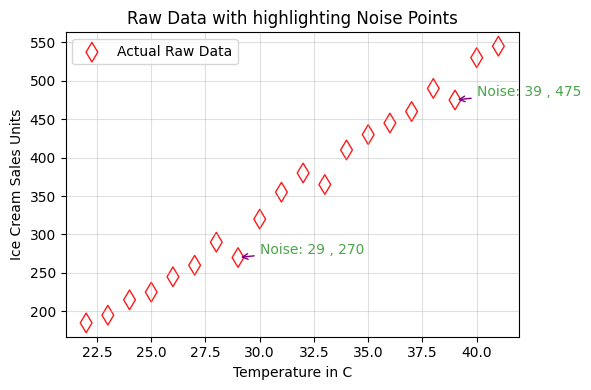

In [66]:
# defining the target and feature variable
X = df[['Temperature_C']].values
y = df[['IceCream_Sales_Units']].values



plt.figure(figsize=(6,4))
plt.scatter(X,y,label='Actual Raw Data',marker='d',facecolor='none', edgecolor='r', alpha=0.9,s=100)
plt.title('Raw Data with highlighting Noise Points')
plt.ylabel('Ice Cream Sales Units')
plt.xlabel('Temperature in C')

#higlighting noisy points
noisy = [(29,270),(39,475)]
for temp, sales in noisy:
    plt.annotate(
        f'Noise: {temp} , {sales}',color='green',alpha=0.7,
        xy=(temp,sales),
        xytext=(temp+1,sales+5),
        arrowprops=dict(arrowstyle='->',color='purple'),
    )
plt.tight_layout()
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

In [67]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)


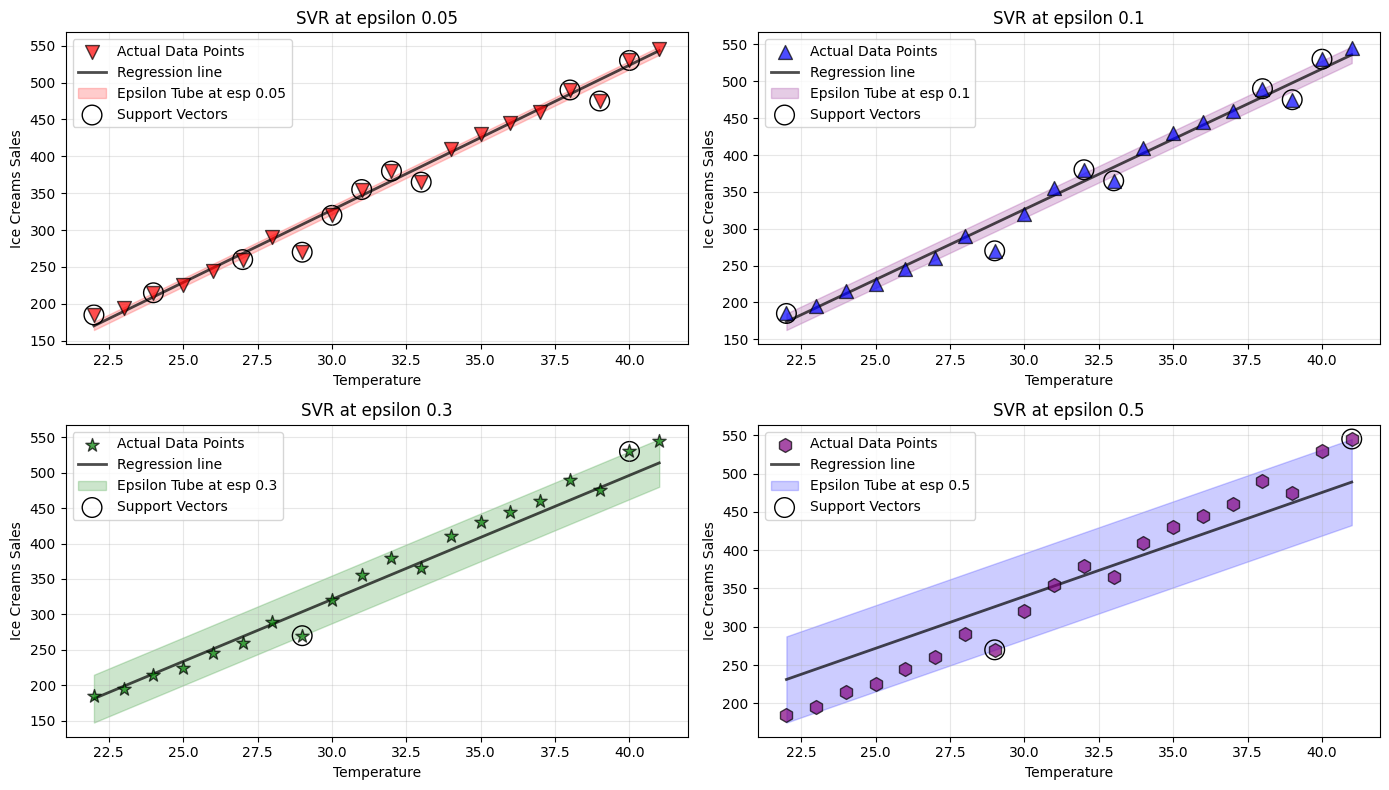

In [68]:
#training SVR model with different epsilons
from sklearn.svm import SVR
epsilons = [0.05, 0.1, 0.3, 0.5,]
colors=['r','blue','green','purple']
markers=['v','^','*','h']

fig , axes = plt.subplots(2,2,figsize=(14,8))
axes = axes.ravel()
for idx, eps in enumerate(epsilons):
    svr = SVR(kernel='linear', C=100,epsilon=eps)
    svr.fit(X_scaled,y_scaled.ravel())

    X_line = np.linspace(X.min(),X.max(),100).reshape(-1,1)
    X_line_scaled = sc_X.transform(X_line)
    y_line_pred_scaled = svr.predict(X_line_scaled)
    y_line_pred = sc_y.inverse_transform(y_line_pred_scaled.reshape(-1,1))

    original_epsilon = svr.epsilon * sc_y.scale_[0]
    upper_y = y_line_pred + original_epsilon
    lower_y = y_line_pred - original_epsilon

    #support vectors
    sv = svr.support_
    sv_X = X[sv]
    sv_y = y[sv]

    axes[idx].scatter(X,y,label='Actual Data Points',color=colors[idx],s=100,edgecolor='black',marker=markers[idx],zorder=5,alpha=0.7)
    axes[idx].plot(X_line,y_line_pred,color='black',linewidth=2, alpha=0.7,label='Regression line')
    axes[idx].fill_between(X_line.ravel(),lower_y.ravel(), upper_y.ravel(),label=f'Epsilon Tube at esp {eps}',color=colors[-idx],alpha=0.2)

    axes[idx].scatter([sv_X],[sv_y],facecolor='none',edgecolor='black',s=200,label='Support Vectors')
    axes[idx].set_ylabel('Ice Creams Sales')
    axes[idx].set_xlabel('Temperature')
    axes[idx].set_title(f'SVR at epsilon {eps}')
    axes[idx].grid(True,alpha=0.3)
    axes[idx].legend()
    
plt.tight_layout()
plt.show()


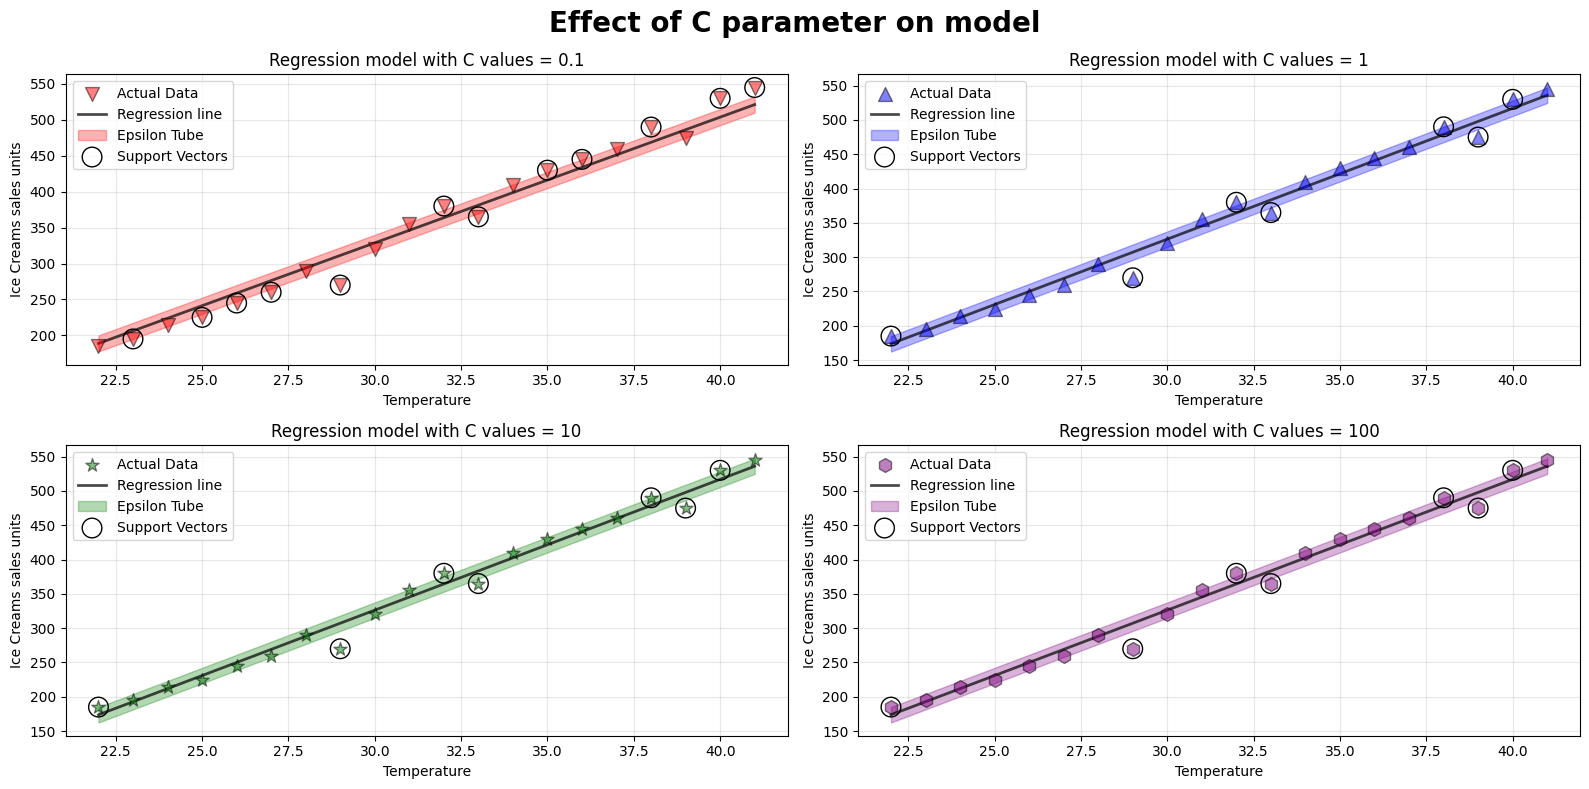

In [71]:
# Visualization at different C values
Cs = [0.1,1,10,100]
fig, axes = plt.subplots(2,2,figsize=(16,8))
for idx, C in enumerate(Cs):
    axes = axes.ravel()
    #traning the model
    svr_C = SVR(kernel='linear',C=C,epsilon=0.1)
    svr_C.fit(X_scaled,y_scaled.ravel())
    y_line_pred_scaled_C = svr_C.predict(X_line_scaled)
    y_line_pred_C = sc_y.inverse_transform(y_line_pred_scaled_C.reshape(-1,1))

    #upper and lower y
    original_epsilon = svr_C.epsilon * sc_y.scale_[0]
    upper_y = y_line_pred_C + original_epsilon
    lower_y = y_line_pred_C - original_epsilon

    #support Vectors
    sv_C = svr_C.support_
    sv_X = X[sv_C]
    sv_y = y[sv_C]

    axes[idx].scatter(X,y,label='Actual Data',color=colors[idx],alpha=0.5,marker=markers[idx],s=100,zorder=5,edgecolor='black')
    axes[idx].plot(X_line,y_line_pred_C,label='Regression line',color='black',alpha=0.7,linewidth=2)
    axes[idx].fill_between(X_line.ravel(),lower_y.ravel(),upper_y.ravel(),color=colors[idx],alpha=0.3,label='Epsilon Tube')
    axes[idx].scatter([sv_X],[sv_y],label='Support Vectors',facecolor='none',edgecolor='black',s=200,zorder=6)
    axes[idx].set_ylabel('Ice Creams sales units')
    axes[idx].set_xlabel('Temperature')
    axes[idx].set_title(f'Regression model with C values = {C}')
    axes[idx].legend()
    axes[idx].grid(True,alpha=0.3)
plt.suptitle('Effect of C parameter on model',fontsize=20,fontweight='bold',x=0.5)
plt.tight_layout()
plt.show()
